## Radius Outlier Removal filter

본 챕터에서는 Noise 제거 방법 중 하나인 Radius Outlier Removal filter에 대하여 다루고 있습니다.

지정된 반경안에 지정된 수 만큼의 포인트가 없을 경우 outlier로 판단 합니다. (`You must specify a search radius and the minimum number of neighbors than a point must have to avoid being labelled as outlier`)

자세한 내용은 [Removing outliers using a Conditional or RadiusOutlier removal](http://pointclouds.org/documentation/tutorials/remove_outliers.php#remove-outliers)를 참고 하시면 됩니다.  

> **[중요]** 현재 정상 동작 하지 않는다고 합니다. 파라미터를 바꾸어도 결과가 '0'이라고 하네요. [[참고]](https://github.com/strawlab/python-pcl/issues/211) - 2018.06.11

In [54]:
%load_ext watermark
%watermark -d -v -p pcl,numpy

2018-11-23 

CPython 3.5.2
IPython 6.4.0

pcl unknown
numpy 1.14.5


In [55]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import pcl
import numpy as np
import random

import os
os.chdir("/workspace/3D_People_Detection_Tracking") 

In [56]:
from include.visualization_helper import *
%matplotlib inline

## Radius_outlier_filtering 정의

입력 
- pcl_data : point cloud
- radius_search : 검색 반경
- Min_Neighbors : Noise로 간주되지 않을 최소 poin 수 

출력  
- point cloud

In [57]:
def do_radius_outlier_filtering(pcl_data, radius_search,Min_Neighbors):
    '''
    :param pcl_data: point could data subscriber
    :radius_search:  
    :Min_Neighbors : a number of neighbors which every index must have 
                     within a specified radius to remain in the PointCloud  
    :return: point cloud data
    eg) cloud = do_radius_outlier_filtering(cloud,0.8, 2)
    :https://github.com/hunjung-lim/3D_People_Detection_Tracking
    '''
    outrem = pcl_data.make_RadiusOutlierRemoval()
    outrem.set_radius_search(radius_search)
    outrem.set_MinNeighborsInRadius(Min_Neighbors)
    
    return outrem.filter ()

## 랜덤 Point Cloud 생성

In [58]:
cloud = pcl.PointCloud()

points = np.zeros((5, 3), dtype=np.float32)
RAND_MAX = 1024.0
for i in range(0, 5):
    points[i][0] = 1024 * random.random () / RAND_MAX
    points[i][1] = 1024 * random.random () / RAND_MAX
    points[i][2] = 1024 * random.random () / RAND_MAX

cloud.from_array(points)

Number of Points : 5
x: 0.3189416527748108, y : 0.6415157318115234, z : 0.6303199529647827
x: 0.6143890619277954, y : 0.9941856265068054, z : 0.8331842422485352
x: 0.5174641609191895, y : 0.4453221261501312, z : 0.858452320098877
x: 0.86646968126297, y : 0.34745171666145325, z : 0.44225549697875977
x: 0.27557268738746643, y : 0.9309353232383728, z : 0.03610602021217346
(x) : 0.6m
(y) : 0.6m
(z) : 0.8m


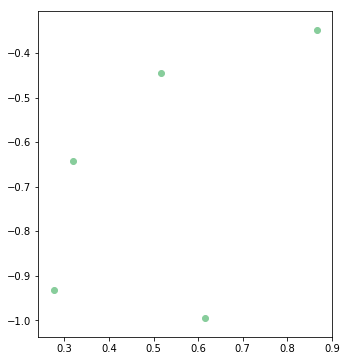

In [59]:
print("Number of Points : {}".format(cloud.size))
for i in range(0, cloud.size):
    print ('x: '  + str(cloud[i][0]) + ', y : ' + str(cloud[i][1])  + ', z : ' + str(cloud[i][2]))

if (cloud.size!=0):
    visualization2D_xyz(cloud.to_array())    

## Radius_outlier_filtering수행

In [60]:
radius_search = 0.08
Min_Neighbors = 2

In [61]:
cloud = do_radius_outlier_filtering(cloud, radius_search, Min_Neighbors)

In [62]:
print("Number of Points : {}".format(cloud.size))
for i in range(0, cloud.size):
    print ('x: '  + str(cloud[i][0]) + ', y : ' + str(cloud[i][1])  + ', z : ' + str(cloud[i][2]))

if (cloud.size!=0):
    visualization2D_xyz(cloud.to_array())    

Number of Points : 0
